<a href="https://colab.research.google.com/github/Jahnavi-Mantripragada/Deep_Learning_Image_Classification/blob/master/BASIC_IMAGE_CLASSIFICATION_WITH_CNN_USING_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
import os

In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
if not os.path.isdir("/content/drive/My Drive/Image Classification with CNNs using Keras/Models"):
    os.mkdir('/content/drive/My Drive/Image Classification with CNNs using Keras/Models')

In [7]:
tf.__version__

'2.3.0'

In [8]:
from tensorflow import keras

### We will use CIFAR10 Dataset: 
https://keras.io/api/datasets/cifar10/

https://www.cs.toronto.edu/~kriz/cifar.html

In [9]:
(Train_X, Train_Y),(Val_X,Val_Y) = keras.datasets.cifar10.load_data()

##### Here, we see that we have 50000 for training and 10000 for validation and the shape of the images: 32x32 and 3 channels

In [10]:
Train_X.shape

(50000, 32, 32, 3)

In [11]:
Train_Y.shape

(50000, 1)

In [12]:
Val_X.shape

(10000, 32, 32, 3)

In [13]:
Val_Y.shape

(10000, 1)

In [14]:
## One HOT Encoding of Y
Train_Y = keras.utils.to_categorical(Train_Y)
test_Y = Val_Y
Val_Y = keras.utils.to_categorical(Val_Y)

In [15]:
Train_Y.shape

(50000, 10)

In [16]:
Val_Y.shape

(10000, 10)

#### Here we build a function to see the results of our trained model on the validation data

#### 1. We will make use of numpy.random.choice() to choose random instances of the validation data
#### >>> import numpy as np
#### >>> np.random.choice(5, 3, replace=False)
#### array([3, 1, 2])
https://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html
#### 2. We will also make use of np.argmax() which returns the index of the biggest value in the np array: 
https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
#### If a value in the y[i] np array is biggest then that is the class to which that X[i] belongs to. As, we will use softmax activation in the neural network and Softmax makes the output sum up to 1 so the output can be interpreted as probabilities.
#### 3. We will make use of pyplot.fig to view the images 
https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html

https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.xticks.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html

https://e2eml.school/matplotlib_framing.html

https://stackoverflow.com/questions/45585183/how-to-draw-a-frame-on-a-matplotlib-figure
#### We will give a red border for those which were predicted incorrectly and green border for those which were predicted correctly

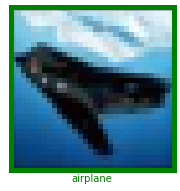

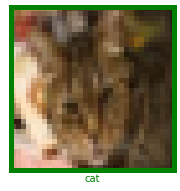

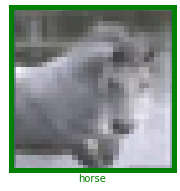

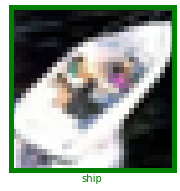

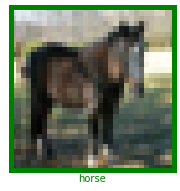

In [17]:
class_names = ["airplane", "automobile", "bird","cat","deer","dog","frog","horse","ship","truck"]
def see_results(X,Y,predictions):
    # About 5 samples
    random_indices = np.random.choice(range(X.shape[0]), 5, replace=False)
    
    X,Y,predictions = X[random_indices],Y[random_indices],predictions[random_indices]
    
    # plt.figure(figsize=(10,10))
    # fig, (ax[0],ax[1],ax[2],ax[3],ax[4]) = plt.subplots()
    # Let's plot the images and their labels
    for i in range(5):
        
        # color: red/green
        
        col = 'green' if np.argmax(Y[i]) == np.argmax(predictions[i]) else 'red'
            
        plt.figure(figsize=(3,3))
        plt.rcParams["axes.edgecolor"] = col
        plt.rcParams["axes.linewidth"] = 5
        plt.imshow(X[i])
        
        # Removing xticks and yticks
        plt.xticks([])
        plt.yticks([])
        
        plt.xlabel(class_names[np.argmax(predictions[i])], color=col)
plt.show()

see_results(Train_X, Train_Y, Train_Y)  

### Building a CNN Model

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

Conv2D: https://keras.io/api/layers/convolution_layers/convolution2d/: For Convolution

MaxPooling2D: https://keras.io/api/layers/pooling_layers/max_pooling2d/: For the purpose of reducing the dimensions Height,Width of the images

Flatten: https://keras.io/api/layers/reshaping_layers/flatten/: To produce a 2D layer of neurons from a 3D layer

BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/: We use this layer to normalize the data so as to speed up the training process

Dropout: https://keras.io/api/layers/regularization_layers/dropout/: To apply regularization in order to avoid overfitting to the data (Weight Decay)

Dense: https://keras.io/api/layers/core_layers/dense/: To make fully connected layers

In [19]:
model  = tf.keras.models.Sequential()

In [20]:
model.add(Input(shape=(32,32,3)))

In [21]:
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

In [22]:
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

In [23]:
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

In [24]:
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(128,activation='relu'))

In [27]:
model.add(Dense(10,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

##### %% time: 
https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html
#### Now we are making use of model.fit():
https://keras.rstudio.com/reference/fit.html

And that function returns a history object which contains the data collected during training process

In [30]:
%%time 

hist = model.fit(
    Train_X/255.,Train_Y,
    validation_data = (Val_X/255.,Val_Y),
    epochs=20,
    batch_size=256,
    callbacks = [
        #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5),
        tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Image Classification with CNNs using Keras/Models/models_{val_accuracy:.3f}.h5',save_best_only=True, 
                                           save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/20
196/196 [==============================] - 5s 27ms/step - loss: 1.6393 - accuracy: 0.3937 - val_loss: 3.2158 - val_accuracy: 0.1418
Epoch 2/20
196/196 [==============================] - 5s 25ms/step - loss: 1.2036 - accuracy: 0.5628 - val_loss: 2.6825 - val_accuracy: 0.2199
Epoch 3/20
196/196 [==============================] - 5s 25ms/step - loss: 1.0217 - accuracy: 0.6323 - val_loss: 1.3223 - val_accuracy: 0.5516
Epoch 4/20
196/196 [==============================] - 5s 25ms/step - loss: 0.8963 - accuracy: 0.6815 - val_loss: 1.0772 - val_accuracy: 0.6410
Epoch 5/20
196/196 [==============================] - 5s 25ms/step - loss: 0.8152 - accuracy: 0.7116 - val_loss: 0.9454 - val_accuracy: 0.6713
Epoch 6/20
196/196 [==============================] - 5s 26ms/step - loss: 0.7473 - accuracy: 0.7355 - val_loss: 0.7423 - val_accuracy: 0.7428
Epoch 7/20
196/196 [==============================] - 5s 25ms/step - loss: 0.6898 - accuracy: 0.7608 - val_loss: 0.7181 - val_accuracy: 0.7492

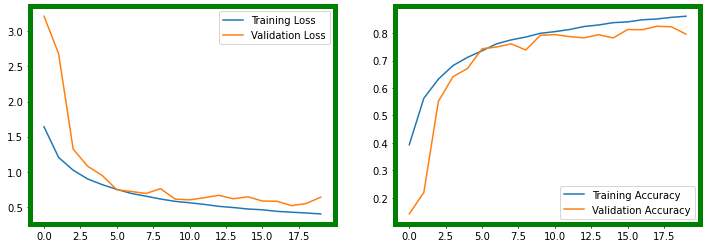

In [31]:
losses = hist.history['loss']
accuracies = hist.history['accuracy']
val_losses = hist.history['val_loss']
val_accuracies = hist.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(12,4))
for i, metrics in enumerate(zip([losses,accuracies],[val_losses,val_accuracies],['Loss','Accuracy'])):
  plt.subplot(1,2,i+1)
  plt.plot(range(epochs),metrics[0],label='Training {}'.format(metrics[2]))
  plt.plot(range(epochs),metrics[1],label='Validation {}'.format(metrics[2]))
  plt.legend()
plt.show()

### Now we shall test our best model. (taken from our Models Folder).

In [32]:
model = tf.keras.models.load_model('/content/drive/My Drive/Image Classification with CNNs using Keras/Models/models_0.859.h5')
predictions = model.predict(Val_X/255.)

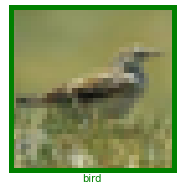

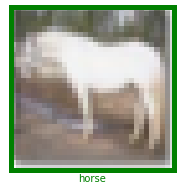

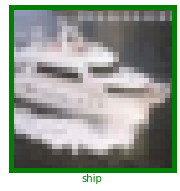

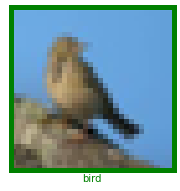

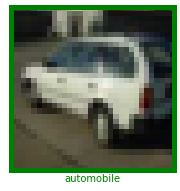

In [33]:
see_results(Val_X,Val_Y,predictions)

In [35]:
from sklearn.metrics import confusion_matrix
predictions = np.argmax(predictions,axis=1)
Actual = []
Predictions = []
for i in predictions:
  Predictions.append(class_names[i])
for j in test_Y:
  Actual.append(class_names[j[0]])
#print(Predictions,Actual)
#print([l not in  for l in class_names])
cm = confusion_matrix(Actual,Predictions, labels=class_names)

In [36]:
#plot_confusion_matrix(cm,class_names)
print(cm)

[[865  10  27  11  13   1   8  13  22  30]
 [  6 926   0   3   1   2   4   0   7  51]
 [ 37   0 777  41  53  32  32  20   5   3]
 [ 14   3  37 759  38  80  42  18   5   4]
 [  7   2  31  31 859  23  17  27   1   2]
 [  5   3  20 141  24 763  10  28   6   0]
 [  5   0  23  38  14  10 900   4   4   2]
 [  6   0   9  30  24  13   4 910   2   2]
 [ 42  15   6   7   5   2   2   2 904  15]
 [ 11  31   4   4   0   2   3   5  14 926]]


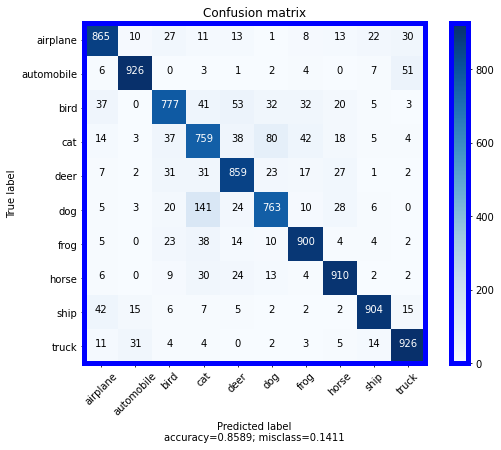

In [37]:

import numpy as np

# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
plt.rcParams["axes.edgecolor"] = 'blue'
plot_confusion_matrix(cm,class_names,normalize=False)